# Fully Connnected

Epoch 1/50
2354/2354 [==============================] - 11s 4ms/step - loss: 1.3389 - accuracy: 0.6641 - val_loss: 0.7257 - val_accuracy: 0.8373
Epoch 2/50
2354/2354 [==============================] - 10s 4ms/step - loss: 0.6446 - accuracy: 0.8516 - val_loss: 0.5592 - val_accuracy: 0.8706
Epoch 3/50
2354/2354 [==============================] - 10s 4ms/step - loss: 0.5401 - accuracy: 0.8719 - val_loss: 0.4956 - val_accuracy: 0.8810
Epoch 4/50
2354/2354 [==============================] - 10s 4ms/step - loss: 0.4913 - accuracy: 0.8819 - val_loss: 0.4781 - val_accuracy: 0.8892
Epoch 5/50
2354/2354 [==============================] - 10s 4ms/step - loss: 0.4579 - accuracy: 0.8896 - val_loss: 0.4564 - val_accuracy: 0.8922
Epoch 6/50
2354/2354 [==============================] - 10s 4ms/step - loss: 0.4336 - accuracy: 0.8949 - val_loss: 0.4504 - val_accuracy: 0.8941
Epoch 7/50
2354/2354 [==============================] - 10s 4ms/step - loss: 0.4167 - accuracy: 0.8986 - val_loss: 0.4423 - val_ac

/home/kbadal/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


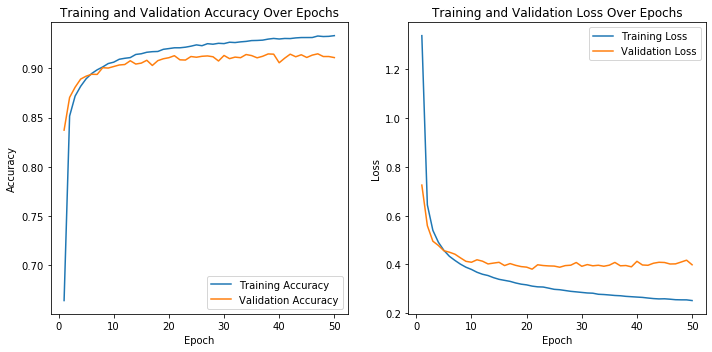

262/262 [==============================] - 1s 3ms/step - loss: 0.3988 - accuracy: 0.9111
Validation Accuracy: 0.9110792279243469


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import joblib
import keras
from sklearn.decomposition import TruncatedSVD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import  joblib
import os
import matplotlib.pyplot as plt

def reset_random_seeds():
    np.random.seed(42)
    tf.random.set_seed(42)
# Function to convert sequences to numeric representation
def sequence_to_numeric(sequence):
    return [CHAR_TO_INT[char] for char in sequence]

# Function to convert numeric representation back to sequence
def numeric_to_sequence(numeric_seq):
    return "".join([INT_TO_CHAR[num] for num in numeric_seq])


def remove_duplicate(word_list):
    unique_words = set()
    result = []

    for word in word_list:
        if word not in unique_words:
            unique_words.add(word)
            result.append(word)

    return result

def get_sequences(file_name):
    sequences = []
    lines = []
    with open(file_name, "r") as input_file:
        lines = list(filter(None, input_file.read().split("\n")))

    parts = []
    for line in lines:
        if line.startswith(">"):
            if parts:
                sequences.append("".join(parts))
            parts = []
        else:
            parts.append(line)
    if parts:
        sequences.append("".join(parts))
    return sequences

def row_average_features(kmers, CHAR_TO_INT):
    features = []
    for kmer in kmers:
        numeric_kmer = [CHAR_TO_INT[char] for char in kmer]
        avg = np.mean(numeric_kmer)
        features.append(avg)
    return features

def process_data(sequences):
    input_output_pairs = []
    for seq in sequences:
        for start in range(len(seq)-11):
            end = start + 11
            seq_in = seq[start:end]
            temp = seq_in[0:10]+ "-"
            seq_out = seq_in[10]
            input_output_pairs.append((temp, seq_out))
            temp = "-" + seq_in[1:11]
            seq_out = seq_in[0]
            input_output_pairs.append((temp, seq_out))
    return input_output_pairs


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

def nn_model(training_sequences):
    X_train_data = []
    y_train_data = []
    training_seq_dict = process_data(training_sequences)
    for keys in training_seq_dict:
        X_train_data = X_train_data + [sequence_to_numeric(keys[0])]
        y_train_data = y_train_data + [CHAR_TO_INT[keys[1]]]

    max_seq_length = max(len(seq) for seq in X_train_data)

    import numpy as np
    X_train = np.array(X_train_data)
    y_train = np.array(y_train_data)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    def create_model(layers, activation):
        model = Sequential()
        for i, nodes in enumerate(layers):
            if i == 0:
                model.add(Dense(nodes, input_dim=max_seq_length, activation=activation))
            else:
                model.add(Dense(nodes, activation=activation))
        model.add(Dense(NUM_CLASSES, activation='softmax'))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    # Define your hyperparameters
    layers = (150, 75)
    activation = 'tanh'
    batch_size = 32
    epoch = 50

    class AccuracyHistory(Callback):
        def on_epoch_end(self, epoch, logs={}):
            train_accuracy = logs.get('accuracy')
            val_accuracy = logs.get('val_accuracy')
            train_loss = logs.get('loss')
            val_loss = logs.get('val_loss')
            print(f"Epoch {epoch + 1}: Training accuracy = {train_accuracy:.4f}, Validation accuracy = {val_accuracy:.4f}")
            train_accuracy_history.append(train_accuracy)
            val_accuracy_history.append(val_accuracy)
            train_loss_history.append(train_loss)
            val_loss_history.append(val_loss)

    train_accuracy_history = []
    val_accuracy_history = []
    train_loss_history = []
    val_loss_history = []

    history_callback = AccuracyHistory()
    model = create_model(layers, activation)
    history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1, callbacks=[history_callback])

    # Save the trained model
    model.save('nn_model.h5')

    # Plotting accuracy
    epochs = len(history.history['accuracy'])  # Get the actual number of epochs
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
    plt.plot(range(1, epochs + 1), train_accuracy_history, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), val_accuracy_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
    plt.plot(range(1, epochs + 1), train_loss_history, label='Training Loss')
    plt.plot(range(1, epochs + 1), val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Accuracy: {accuracy}')

    return model

# Reset random seeds
reset_random_seeds()

# Get the current working directory
cwd = os.getcwd()

training_sequences = list(set(get_sequences("data/p5A_training_sequence.txt")))
# Extract all characters from all sequences to create mappings and determine classes
all_chars = set("".join(training_sequences) + "-")

# Determine global variables at runtime
global NUM_CLASSES, CHAR_TO_INT, INT_TO_CHAR
NUM_CLASSES = len(all_chars)
CHAR_TO_INT = {c: i for i, c in enumerate(all_chars)}
INT_TO_CHAR = {v: k for k, v in CHAR_TO_INT.items()}

# Continue with the neural network model training using the provided functions
nn_model = nn_model(training_sequences)

In [19]:
de_novo_sequence = "----------LSLSPGERATLSC----SVSSSYLAWYQQKPGQAPRLLIYDASTRATGIPDRF----SGAD\
FLLTISSLEPEDFAMYYCQQYGRSPYTFGPGTKVDIKRTVAAPSVFIFPP----LKSGTASVVCLLNNFYP\
REAKVQWKVDNALQSGNSQESVTEQDSKD----LSSTLTLSKADYEKHKV--------\
GLSSPVTKSFN----"

new_seq = []
for count,  i in enumerate(range(len(de_novo_sequence) - 11 + 1)):
    kmer = de_novo_sequence[i:i + 11]
    new_seq = new_seq + [kmer]

while "-" in de_novo_sequence:
    keys_with_dash = [key for key in new_seq if key.count('-') == 1]
    if len(keys_with_dash) == 0:
        keys_with_dash = [key for key in new_seq if key.count('--') == 2]
    for k in keys_with_dash:
        if k[0] == "-" or k[10] == "-":
            if k in de_novo_sequence:
                
                # Convert de novo sequence and its reverse to numeric representation
                de_novo_sequence_numeric = sequence_to_numeric(k)

                X_de_novo = np.array([de_novo_sequence_numeric])
                
                # Make predictions for the de novo sequence reverse
                y_pred = nn_model.predict(X_de_novo)
                max_prob_index = np.argmax(y_pred)

                # Retrieve the corresponding character from INT_TO_CHAR dictionary
                predicted_char = INT_TO_CHAR[max_prob_index]

                # Convert the predicted labels back to sequences for verification
                predicted_value =  INT_TO_CHAR[max_prob_index]
                print(predicted_value)
                index = de_novo_sequence.index(k)
                index1 = k.index("-")
                temp = k
                temp = temp.replace("-",predicted_value)
                print(temp)
                de_novo_sequence = de_novo_sequence.replace(k, temp)

            # Update new_seq after filling a gap
                new_seq.clear()
                for count, i in enumerate(range(len(de_novo_sequence) - 11 + 1)):
                    kmer = de_novo_sequence[i:i + 11]
                    new_seq = new_seq + [kmer]
                keys_with_dash = [key for key in new_seq if key.count('-') == 1]
                if len(keys_with_dash) == 0:
                    keys_with_dash = [key for key in new_seq if key.count('--') == 2]
        
# Print the predicted sequence for the de novo sequence
print("Predicted Sequence for De Novo:", de_novo_sequence)

1/1 [==============================] - 0s 19ms/step
T
TLSLSPGERAT
1/1 [==============================] - 0s 23ms/step
R
SPGERATLSCR
1/1 [==============================] - 0s 17ms/step
Q
QSVSSSYLAWY
1/1 [==============================] - 0s 207ms/step
S
TRATGIPDRFS
1/1 [==============================] - 0s 16ms/step
G
GSGADFLLTIS
1/1 [==============================] - 0s 16ms/step
S
AAPSVFIFPPS
1/1 [==============================] - 0s 22ms/step
Q
QLKSGTASVVC
1/1 [==============================] - 0s 20ms/step
S
ESVTEQDSKDS
1/1 [==============================] - 0s 18ms/step
S
SLSSTLTLSKA
1/1 [==============================] - 0s 23ms/step
Y
SKADYEKHKVY
1/1 [==============================] - 0s 16ms/step
Q
QGLSSPVTKSF
1/1 [==============================] - 0s 16ms/step
R
LSSPVTKSFNR
1/1 [==============================] - 0s 16ms/step
G
GTLSLSPGERA
1/1 [==============================] - 0s 23ms/step
A
PGERATLSCRA
1/1 [==============================] - 0s 16ms/step
S
SQSVSSSYLAW
1/1 [====

In [20]:
input_seq ="EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPRLLIYDASTRATGIPDRFSGSGSGAD\
FLLTISSLEPEDFAMYYCQQYGRSPYTFGPGTKVDIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYP\
REAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQ\
GLSSPVTKSFNRGEC"
scaffold_seq = "----------LSLSPGERATLSC----SVSSSYLAWYQQKPGQAPRLLIYDASTRATGIPDRF----SGAD\
FLLTISSLEPEDFAMYYCQQYGRSPYTFGPGTKVDIKRTVAAPSVFIFPP----LKSGTASVVCLLNNFYP\
REAKVQWKVDNALQSGNSQESVTEQDSKD----LSSTLTLSKADYEKHKV--------\
GLSSPVTKSFN----"

print(scaffold_seq)
predicted_seq = de_novo_sequence
print("Predicted Sequence:", predicted_seq)



----------LSLSPGERATLSC----SVSSSYLAWYQQKPGQAPRLLIYDASTRATGIPDRF----SGADFLLTISSLEPEDFAMYYCQQYGRSPYTFGPGTKVDIKRTVAAPSVFIFPP----LKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKD----LSSTLTLSKADYEKHKV--------GLSSPVTKSFN----
Predicted Sequence: EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPRLLIYDASTRATGIPDRFSGRGSGADFLLTISSLEPEDFAMYYCQQYGRSPYTFGPGTKVDIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC


In [21]:

gap_count=0
full_count = 0


print(scaffold_seq)
print(predicted_seq)
print(input_seq)
for i in range(0,len(input_seq)):
    if scaffold_seq[i] == "-" and input_seq[i]== predicted_seq[i]:
        gap_count = gap_count +1
    if input_seq[i]== predicted_seq[i]:
        full_count=   full_count+1
print(gap_count)
total = scaffold_seq.count("-")
print("gap%: ",gap_count/total)
print("full%: ",full_count/len(input_seq))

----------LSLSPGERATLSC----SVSSSYLAWYQQKPGQAPRLLIYDASTRATGIPDRF----SGADFLLTISSLEPEDFAMYYCQQYGRSPYTFGPGTKVDIKRTVAAPSVFIFPP----LKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKD----LSSTLTLSKADYEKHKV--------GLSSPVTKSFN----
EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPRLLIYDASTRATGIPDRFSGRGSGADFLLTISSLEPEDFAMYYCQQYGRSPYTFGPGTKVDIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPRLLIYDASTRATGIPDRFSGSGSGADFLLTISSLEPEDFAMYYCQQYGRSPYTFGPGTKVDIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
37
gap%:  0.9736842105263158
full%:  0.9953488372093023
